<a href="https://colab.research.google.com/github/yudisdc1/Portofolio/blob/main/Expectation%20Maximization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **LATIHAN 2 - Expectation Maximization**
## **Anggota Kelompok I :**
### 1) Timothy Devan Chandra (1906375726)
### 2) Yudistira Dwi Cahya (2006530942)
### 3) Jovina Nareswari Hubballillah (2106708223)
### 4) Zahra Novanka (1806185834)

**IMPOR MODUL DAN DATA**

Terlebih dahulu dilakukan impor modul ke dalam program yang akan dibuat. Dengan mengimpor modul, maka definisi, variabel, fungsi, dan yang lainnya yang terdapat pada modul tersebut dapat dipergunakan. Melakukan pengambilan data yang ingin digunakan dari sumber yang telah diperoleh.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

url = 'https://raw.githubusercontent.com/timothydevann/Assignment1-Gaussian-Mixture-Model/main/Iris.csv'
data = pd.read_csv(url)
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [2]:
data1 = data.drop(["Id","Species","SepalLengthCm","SepalWidthCm"], axis=1)

In [3]:
data2 = data.drop(["Id","Species","PetalLengthCm","PetalWidthCm"], axis=1)

In [4]:
#Clustering Data (data Petal)
#Menentukan 2 jenis data (data Petal) yang akan dipakai terlebih dahulu.
data1.head()

,PetalLengthCm,PetalWidthCm
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


In [5]:
#Clustering Data (data Sepal)
#Menentukan 2 jenis data (data Sepal).
data2.head()

,SepalLengthCm,SepalWidthCm
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6


# KMeans

K-Means digunakan untuk meminimalisasikan fungsi objective yang telah di set dalam proses clustering. Tujuan ini dilakukan dengan cara meminimalikan variasi data yang ada didalam cluster dan memaksimalikan variasi data yang ada di cluster lainnya.

In [19]:
#training k-means model (Data Petal)
from matplotlib import pyplot as plt
from matplotlib.patches import Ellipse
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)
kmeans.fit(data1)

KMeans(n_clusters=3)

In [7]:
#predictions from kmeans (Data Petal)
pred = kmeans.predict(data1)
frame = pd.DataFrame(data1)
frame['cluster'] = pred
frame.columns = ['PetalLengthCm', 'PetalWidthCm', 'cluster']

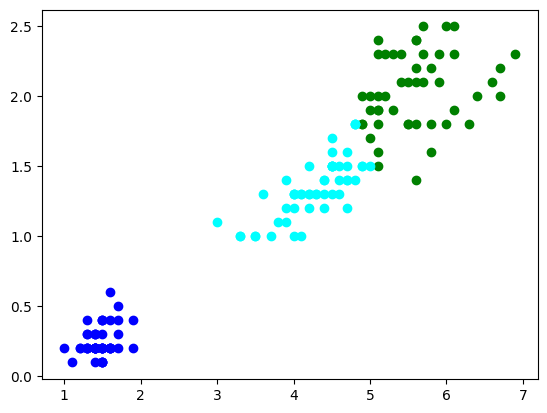

In [8]:
#plotting results (Data Petal)
color=['blue', 'green', 'cyan', 'black']
for k in range(0,4):
    datapetal = frame[frame["cluster"]==k]
    plt.scatter(datapetal["PetalLengthCm"], datapetal["PetalWidthCm"], c=color[k])
plt.show()

Analisis Model : Dapat dilihat dari grafik diatas bahwa pada data petal di cluster berwarna **biru tua** yang dibuat memiliki bentuk melingkar yang cenderung ke titik tengah pada pusatnya. Dikarenakan centroid (pusat) dari cluster nya diperbarui secara iteratif menggunakan nilai rata-rata.

sedangkan untuk cluster berwarna **biru muda dan hijau** mengartikan bahwa model k-means gagal mengidentifikasi hak cluster.

In [9]:
#training k-means model (Data Sepal)
kmeans = KMeans(n_clusters=3)
kmeans.fit(data2)

KMeans(n_clusters=3)

In [10]:
#predictions from kmeans (Data Sepal)
pred = kmeans.predict(data2)
frame = pd.DataFrame(data2)
frame['cluster'] = pred
frame.columns = ['SepalLengthCm', 'SepalWidthCm', 'cluster']

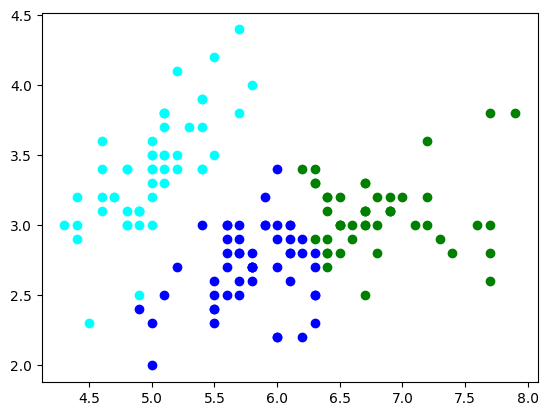

In [11]:
#plotting results (Data Sepal)
color=['blue', 'green', 'cyan', 'black']
for k in range(0,4):
    datasepal = frame[frame["cluster"]==k]
    plt.scatter(datasepal["SepalLengthCm"], datasepal["SepalWidthCm"], c=color[k])
plt.show()

Analisis Model : Dari grafik diatas distribusi poin tidak dalam bentuk melingkar, melainkan tersebar dan ada yang membentuk elips. Dapat diartikan bahwa k-means gagal mengidentifikasi cluster yg tepat. Maka digunakan metode model berbasis distribusi.

# GMM

Model Campuran Gaussian (GMMs) mengasumsikan bahwa ada sejumlah distribusi Gaussian, dan masing-masing distribusi mewakili sebuah cluster. Oleh karena itu, Campuran Gaussian
Model cenderung mengelompokkan titik-titik data milik satu distribusi bersama.

In [12]:
import pandas as pd

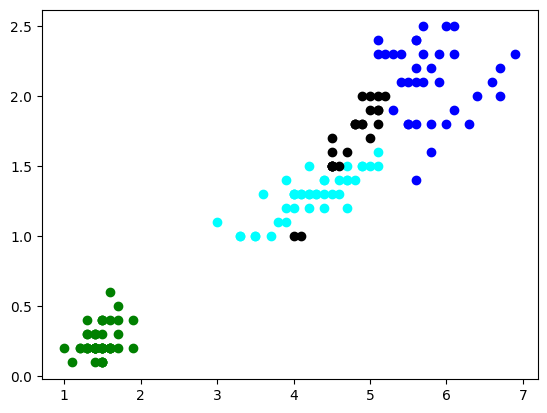

In [13]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=4)
gmm.fit(data1)

labels = gmm.predict(data1)
frame = pd.DataFrame(data1)
frame['cluster'] = labels
frame.columns = ['PetalLengthCm', 'PetalWidthCm', 'cluster']

color=['blue', 'green', 'cyan', 'black',]
for k in range(0,4):
    datapgmm = frame[frame["cluster"]==k]
    plt.scatter(datapgmm["PetalLengthCm"], datapgmm["PetalWidthCm"], c=color[k])
plt.show()

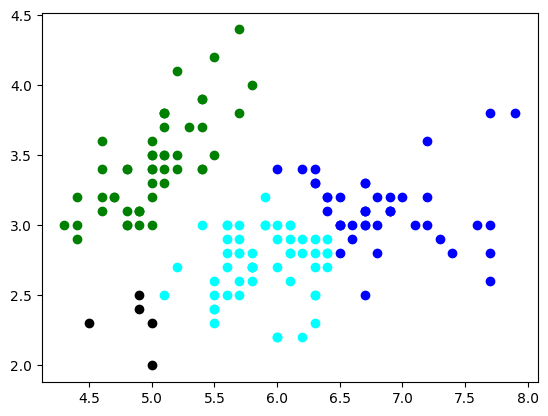

In [14]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=4)
gmm.fit(data2)

labels = gmm.predict(data2)
frame = pd.DataFrame(data2)
frame['cluster'] = labels
frame.columns = ['SepalLengthCM', 'SepalWidthCm', 'cluster']

color=['blue', 'green', 'cyan', 'black',]
for k in range(0,4):
    datasgmm = frame[frame["cluster"]==k]
    plt.scatter(datasgmm["SepalLengthCM"], datasgmm["SepalWidthCm"], c=color[k])
plt.show()

In [15]:
from sklearn.datasets import load_iris
from sklearn.mixture import GaussianMixture

# Load dataset
iris = load_iris()

In [16]:
#Contoh Pendekatan GMM dengan EM
# Contoh Mencoba GMM dengan jenis covarians yang berbeda pada data 2d
estimators = dict((cov_type, GaussianMixture(n_components=3,
                   covariance_type=cov_type, max_iter=20, random_state=0))
                  for cov_type in ['spherical', 'diag', 'tied', 'full'])

for (name,estimator) in estimators.items():
    estimator.fit(iris.data[:,2:4]) ## fits mixture model menggunakan EM

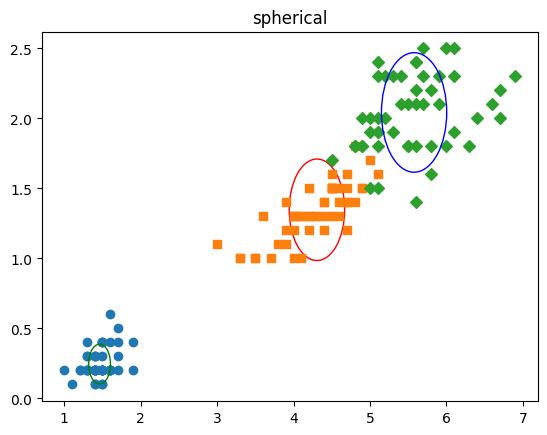

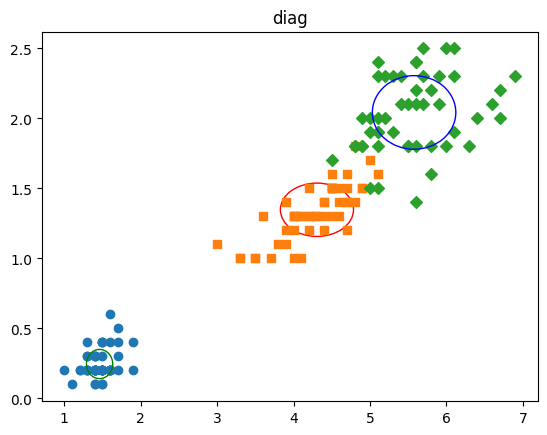

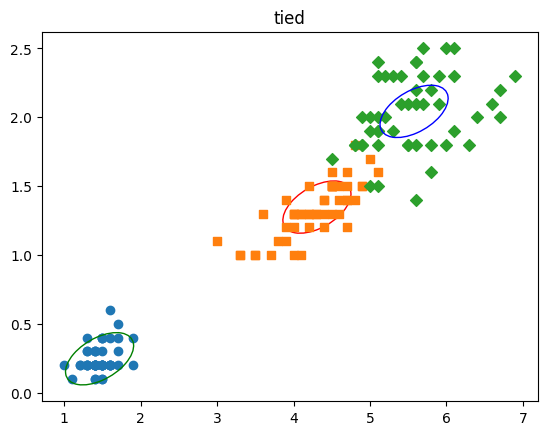

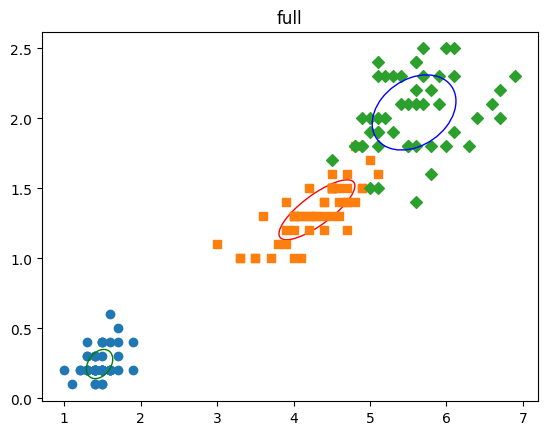

In [20]:
#Contoh Code Visualisasi GMM dengan EM dan tipe covariansi yang berbeda
colors = ['red', 'green', 'blue']
markers = ['o', 's', 'D']

def plot_cov_ellipse(cov, pos, col='black', ax=None):
    if ax is None:
        ax = plt.gca()
    eigvals, eigvecs = np.linalg.eigh(cov)
    order = eigvals.argsort()[::-1]
    eigvals, eigvecs = eigvals[order], eigvecs[:, order]
    theta = np.degrees(np.arctan2(*eigvecs[:, 0][::-1]))
    width, height = 2 * np.sqrt(eigvals)
    ellip = Ellipse(xy=pos, width=width, height=height, angle=theta, edgecolor=col, fc='none')
    ax.add_patch(ellip)

for (name,gmm) in estimators.items():
    for n, color in enumerate(colors):
        data = iris.data[iris.target == n]
        plt.scatter(data[:, 2], data[:, 3], marker=markers[n])
        if gmm.covariance_type == 'full':
            cov = gmm.covariances_[n]
        elif gmm.covariance_type == 'tied':
            cov = gmm.covariances_
        elif gmm.covariance_type == 'diag':
            cov = np.diag(gmm.covariances_[n])
        elif gmm.covariance_type == 'spherical':
            cov = np.eye(gmm.means_.shape[1]) * gmm.covariances_[n]
        #print(cov)
        pos = estimator.means_[n]
        #print(pos)
        plot_cov_ellipse(cov,pos,col=color)
    plt.title(name)
    plt.show()